#Neural Networks for Supervised Learning

Connect to Google Drive

In [ ]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/datasets/US Stock Market Dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2/2/2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN
1,1,1/2/2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1013 non-null   int64  
 1   Date               1013 non-null   object 
 2   Natural_Gas_Price  1013 non-null   float64
 3   Natural_Gas_Vol.   1009 non-null   float64
 4   Crude_oil_Price    1013 non-null   float64
 5   Crude_oil_Vol.     990 non-null    float64
 6   Copper_Price       1013 non-null   float64
 7   Copper_Vol.        976 non-null    float64
 8   Bitcoin_Price      1013 non-null   object 
 9   Bitcoin_Vol.       1013 non-null   int64  
 10  Platinum_Price     1013 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1013 non-null   object 
 13  Ethereum_Vol.      1013 non-null   int64  
 14  S&P_500_Price      1013 non-null   object 
 15  Nasdaq_100_Price   1013 non-null   object 
 16  Nasdaq_100_Vol.    1012 

In [ ]:
df.shape

(1013, 39)

In [ ]:
df.iloc[0]

Unnamed: 0                     0
Date                    2/2/2024
Natural_Gas_Price          2.079
Natural_Gas_Vol.             NaN
Crude_oil_Price            72.28
Crude_oil_Vol.               NaN
Copper_Price              3.8215
Copper_Vol.                  NaN
Bitcoin_Price          43,194.70
Bitcoin_Vol.               42650
Platinum_Price             901.6
Platinum_Vol.                NaN
Ethereum_Price          2,309.28
Ethereum_Vol.             246890
S&P_500_Price           4,958.61
Nasdaq_100_Price       17,642.73
Nasdaq_100_Vol.      315620000.0
Apple_Price               185.85
Apple_Vol.             102550000
Tesla_Price               187.91
Tesla_Vol.             110610000
Microsoft_Price           411.22
Microsoft_Vol.          28260000
Silver_Price              22.796
Silver_Vol.                  NaN
Google_Price              142.38
Google_Vol.             62500000
Nvidia_Price               661.6
Nvidia_Vol.             47660000
Berkshire_Price         5,89,498
Berkshire_

In [ ]:
df.drop(["Unnamed: 0", "Date"], axis=1, inplace=True)
df.iloc[0]

Natural_Gas_Price          2.079
Natural_Gas_Vol.             NaN
Crude_oil_Price            72.28
Crude_oil_Vol.               NaN
Copper_Price              3.8215
Copper_Vol.                  NaN
Bitcoin_Price          43,194.70
Bitcoin_Vol.               42650
Platinum_Price             901.6
Platinum_Vol.                NaN
Ethereum_Price          2,309.28
Ethereum_Vol.             246890
S&P_500_Price           4,958.61
Nasdaq_100_Price       17,642.73
Nasdaq_100_Vol.      315620000.0
Apple_Price               185.85
Apple_Vol.             102550000
Tesla_Price               187.91
Tesla_Vol.             110610000
Microsoft_Price           411.22
Microsoft_Vol.          28260000
Silver_Price              22.796
Silver_Vol.                  NaN
Google_Price              142.38
Google_Vol.             62500000
Nvidia_Price               661.6
Nvidia_Vol.             47660000
Berkshire_Price         5,89,498
Berkshire_Vol.             10580
Netflix_Price             564.64
Netflix_Vo

In [ ]:
col_change = ["Bitcoin_Price", "Platinum_Price", "Ethereum_Price", "S&P_500_Price", "Nasdaq_100_Price", "Berkshire_Price", "Gold_Price"]
df[col_change] = df[col_change].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Natural_Gas_Price  1013 non-null   float64
 1   Natural_Gas_Vol.   1009 non-null   float64
 2   Crude_oil_Price    1013 non-null   float64
 3   Crude_oil_Vol.     990 non-null    float64
 4   Copper_Price       1013 non-null   float64
 5   Copper_Vol.        976 non-null    float64
 6   Bitcoin_Price      0 non-null      float64
 7   Bitcoin_Vol.       1013 non-null   int64  
 8   Platinum_Price     635 non-null    float64
 9   Platinum_Vol.      636 non-null    float64
 10  Ethereum_Price     249 non-null    float64
 11  Ethereum_Vol.      1013 non-null   int64  
 12  S&P_500_Price      0 non-null      float64
 13  Nasdaq_100_Price   0 non-null      float64
 14  Nasdaq_100_Vol.    1012 non-null   float64
 15  Apple_Price        1013 non-null   float64
 16  Apple_Vol.         1013 

In [ ]:
df.isnull().sum()

Natural_Gas_Price       0
Natural_Gas_Vol.        4
Crude_oil_Price         0
Crude_oil_Vol.         23
Copper_Price            0
Copper_Vol.            37
Bitcoin_Price        1013
Bitcoin_Vol.            0
Platinum_Price        378
Platinum_Vol.         377
Ethereum_Price        764
Ethereum_Vol.           0
S&P_500_Price        1013
Nasdaq_100_Price     1013
Nasdaq_100_Vol.         1
Apple_Price             0
Apple_Vol.              0
Tesla_Price             0
Tesla_Vol.              0
Microsoft_Price         0
Microsoft_Vol.          0
Silver_Price            0
Silver_Vol.            46
Google_Price            0
Google_Vol.             0
Nvidia_Price            0
Nvidia_Vol.             0
Berkshire_Price      1013
Berkshire_Vol.          0
Netflix_Price           0
Netflix_Vol.            0
Amazon_Price            0
Amazon_Vol.             0
Meta_Price              0
Meta_Vol.               0
Gold_Price           1013
Gold_Vol.               2
dtype: int64

In [ ]:
df.isna().sum()

Natural_Gas_Price       0
Natural_Gas_Vol.        4
Crude_oil_Price         0
Crude_oil_Vol.         23
Copper_Price            0
Copper_Vol.            37
Bitcoin_Price        1013
Bitcoin_Vol.            0
Platinum_Price        378
Platinum_Vol.         377
Ethereum_Price        764
Ethereum_Vol.           0
S&P_500_Price        1013
Nasdaq_100_Price     1013
Nasdaq_100_Vol.         1
Apple_Price             0
Apple_Vol.              0
Tesla_Price             0
Tesla_Vol.              0
Microsoft_Price         0
Microsoft_Vol.          0
Silver_Price            0
Silver_Vol.            46
Google_Price            0
Google_Vol.             0
Nvidia_Price            0
Nvidia_Vol.             0
Berkshire_Price      1013
Berkshire_Vol.          0
Netflix_Price           0
Netflix_Vol.            0
Amazon_Price            0
Amazon_Vol.             0
Meta_Price              0
Meta_Vol.               0
Gold_Price           1013
Gold_Vol.               2
dtype: int64

In [ ]:
features = df.columns.tolist()

In [ ]:
mean_values = df.mean().fillna(0)
mean_values

Natural_Gas_Price    3.726667e+00
Natural_Gas_Vol.     1.290919e+05
Crude_oil_Price      6.985347e+01
Crude_oil_Vol.       3.571739e+05
Copper_Price         3.726843e+00
Copper_Vol.          3.760675e+04
Bitcoin_Price        0.000000e+00
Bitcoin_Vol.         4.924137e+07
Platinum_Price       9.134471e+02
Platinum_Vol.        9.082516e+03
Ethereum_Price       3.079955e+02
Ethereum_Vol.        1.958002e+07
S&P_500_Price        0.000000e+00
Nasdaq_100_Price     0.000000e+00
Nasdaq_100_Vol.      2.359978e+08
Apple_Price          1.419645e+02
Apple_Vol.           9.789383e+07
Tesla_Price          2.089283e+02
Tesla_Vol.           1.330475e+08
Microsoft_Price      2.658389e+02
Microsoft_Vol.       3.044173e+07
Silver_Price         2.279536e+01
Silver_Vol.          6.421680e+04
Google_Price         1.086599e+02
Google_Vol.          3.428595e+07
Nvidia_Price         2.197381e+02
Nvidia_Vol.          4.629821e+07
Berkshire_Price      0.000000e+00
Berkshire_Vol.       2.918401e+03
Netflix_Price 

Using an imputer to fulfill NA and null values

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.compose import ColumnTransformer

imputer_transformer = SimpleImputer(strategy='constant', fill_value=0)

#There is a bug with strategy = 'mean' which deletes the features with NA values
#Recovered from: https://github.com/scikit-learn/scikit-learn/issues/16426

preprocessor = ColumnTransformer(
    transformers=[
        ('impute', imputer_transformer, features)
    ], remainder='passthrough'
)

imputer_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [ ]:
df_imputed = imputer_pipeline.fit_transform(df)

In [ ]:
df_imputed = pd.DataFrame(df_imputed, columns=features)

In [ ]:
df_imputed

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2.079,0.0,72.28,0.0,3.8215,0.0,0.0,42650.0,901.60,0.0,...,0.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,0.0,0.0
1,2.050,161340.0,73.82,577940.0,3.8535,0.0,0.0,47690.0,922.30,0.0,...,0.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,0.0,260920.0
2,2.100,142860.0,75.85,344490.0,3.9060,0.0,0.0,56480.0,932.60,0.0,...,0.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,0.0,238370.0
3,2.077,139750.0,77.82,347240.0,3.9110,0.0,0.0,55130.0,931.70,0.0,...,0.0,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,0.0,214590.0
4,2.490,3590.0,76.78,331930.0,3.8790,0.0,0.0,45230.0,938.30,0.0,...,0.0,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,0.0,1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,2.141,242560.0,59.61,1210000.0,2.8120,77700.0,0.0,1190000.0,961.00,0.0,...,0.0,190.0,339.26,7110000.0,94.60,70240000.0,215.22,13490000.0,0.0,813410.0
1009,2.162,163010.0,62.70,582650.0,2.7935,59470.0,0.0,1010000.0,977.75,0.0,...,0.0,280.0,330.75,4740000.0,95.34,82680000.0,213.06,15110000.0,0.0,435870.0
1010,2.135,154680.0,63.27,724240.0,2.7900,59570.0,0.0,786750.0,969.35,0.0,...,0.0,280.0,335.83,5670000.0,95.14,81310000.0,212.60,17070000.0,0.0,558970.0
1011,2.130,144670.0,63.05,885860.0,2.7870,74750.0,0.0,936290.0,988.55,0.0,...,0.0,220.0,325.90,3800000.0,93.75,75330000.0,208.67,11200000.0,0.0,436740.0


In [ ]:
df_imputed.isnull().sum()

Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64

In [ ]:
df_imputed.isna().sum()

Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64

Visualize the data

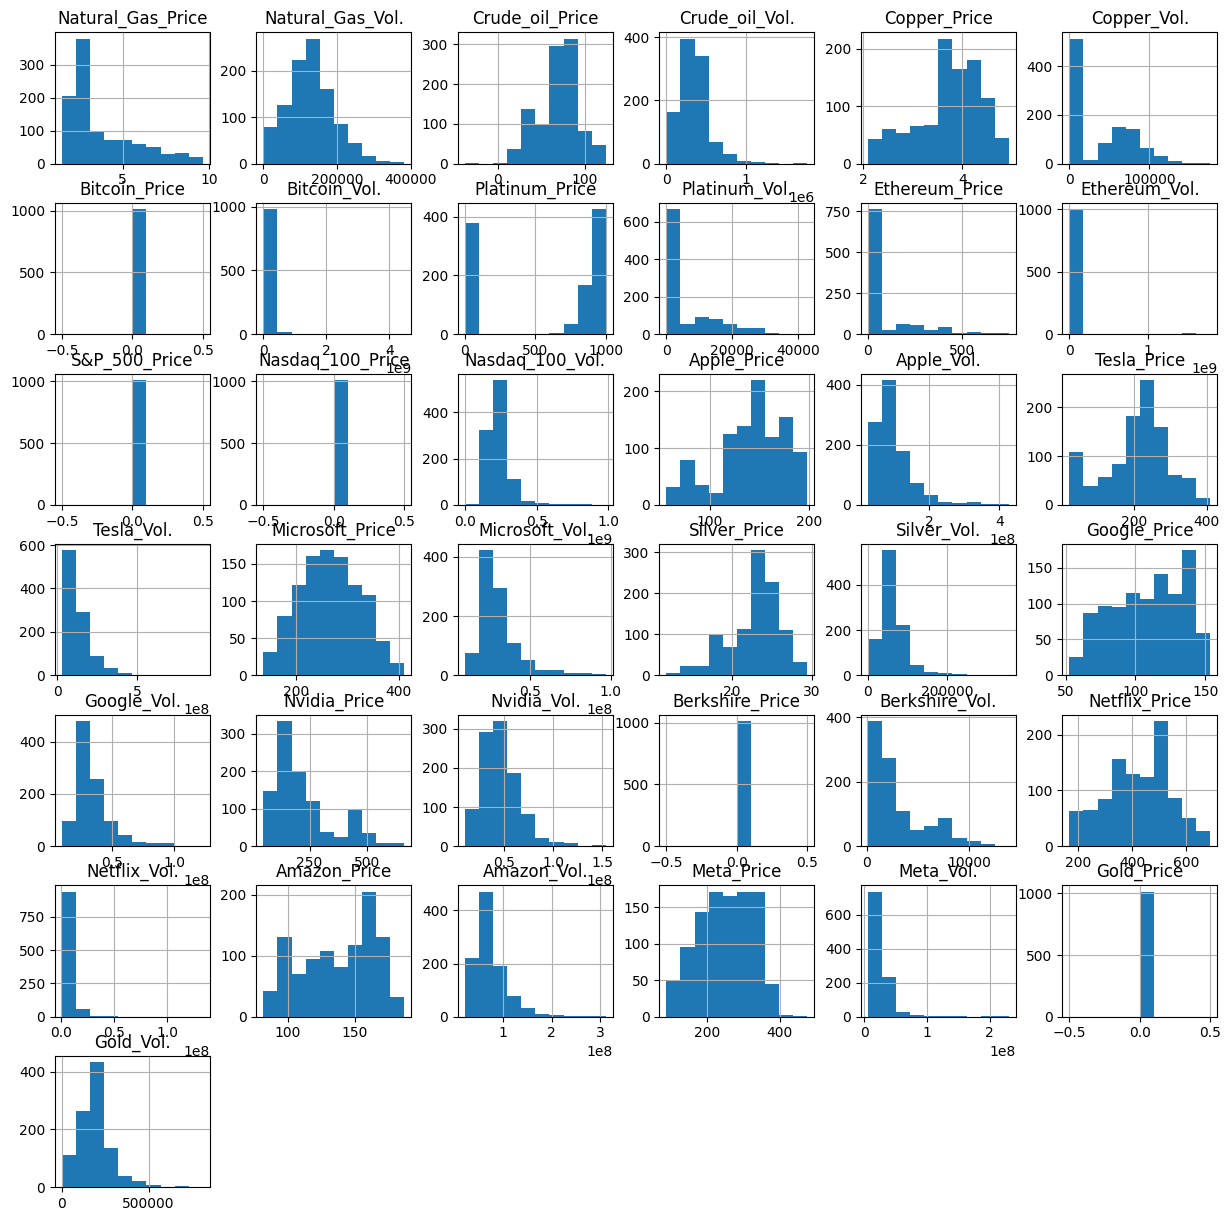

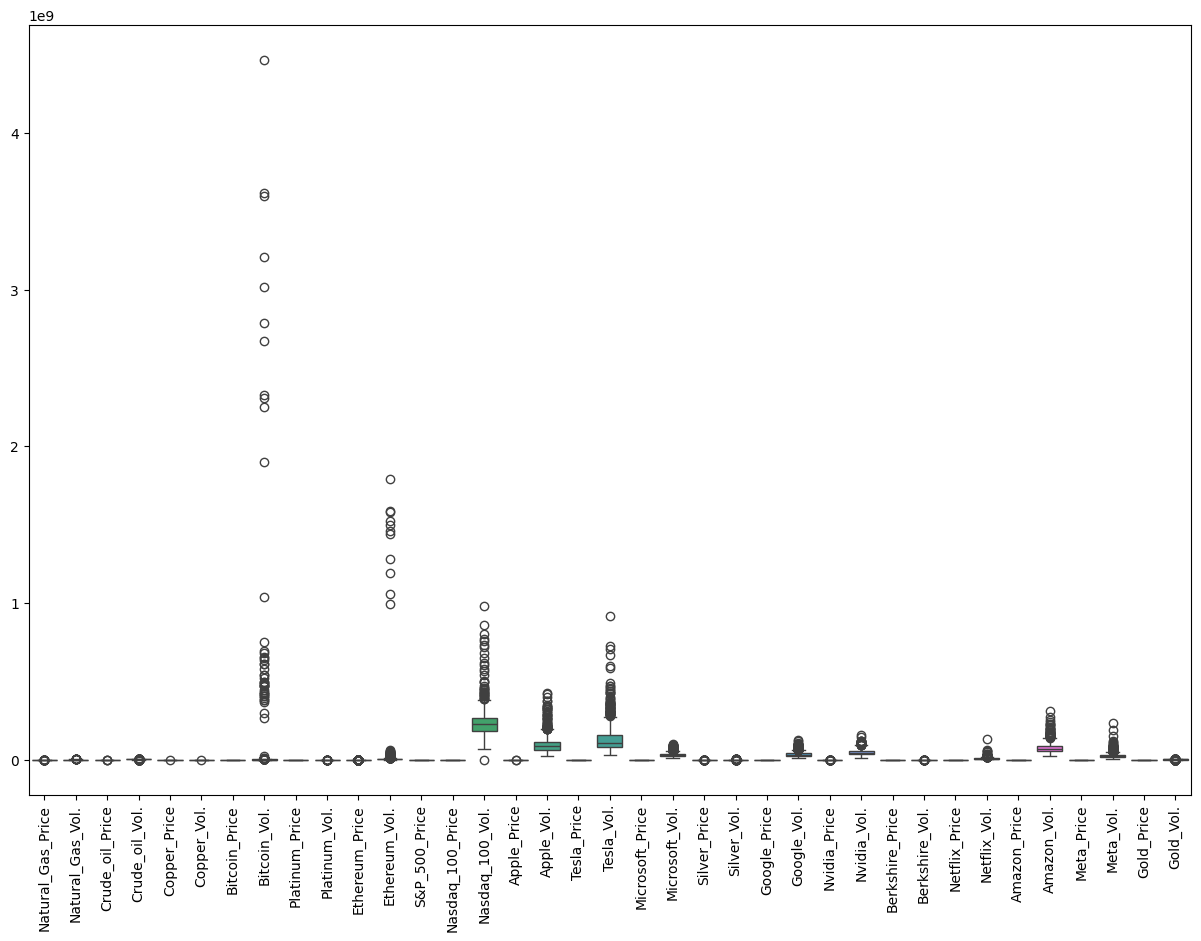

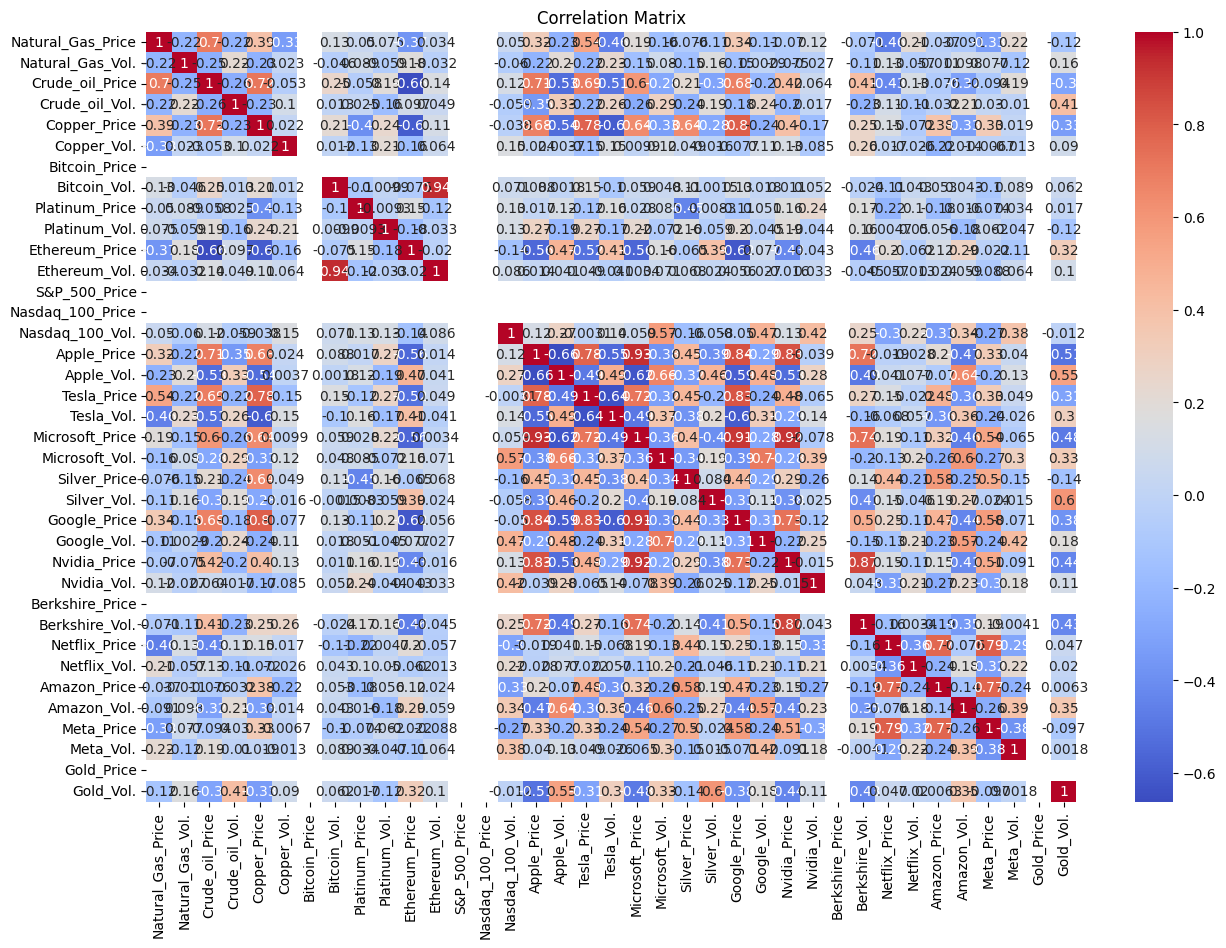

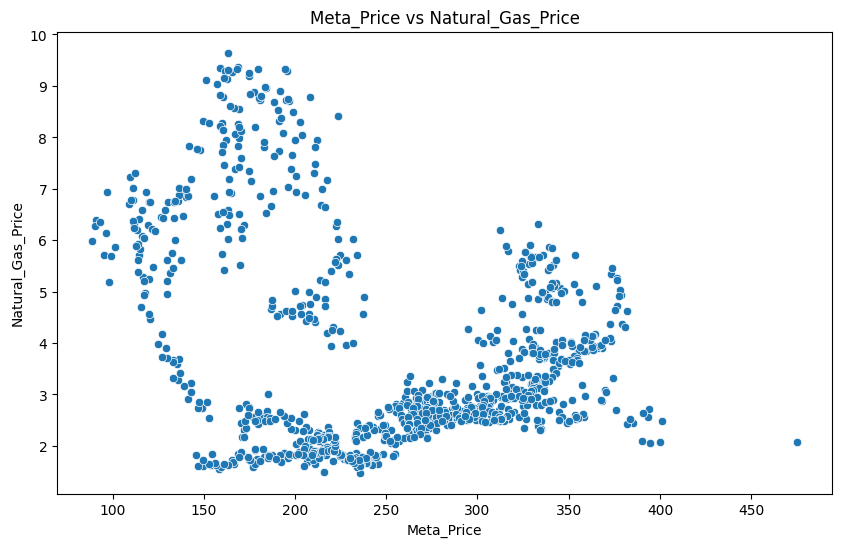

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_imputed.hist(figsize=(15, 15))
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_imputed)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Meta_Price', y='Natural_Gas_Price', data=df_imputed)
plt.title('Meta_Price vs Natural_Gas_Price')
plt.show()

Use a neural network architecture to predict thr Bitcoin Price

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import KFold

In [ ]:
X = df_imputed.drop(columns=['Meta_Price'])
y = df_imputed['Meta_Price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Define the neural network architecture

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

Compile the model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

Train the model

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=0)

Loss Function => MSE

In [ ]:
val_loss = model.evaluate(X_val_scaled, y_val)
print("Validation Loss:", val_loss)

test_loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

7/7 [==============================] - 0s 2ms/step - loss: 1186.5494
Validation Loss: 1186.5494384765625
7/7 [==============================] - 0s 2ms/step - loss: 969.9026
Test Loss: 969.9026489257812


In [ ]:
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

val_mse = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", val_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)

7/7 [==============================] - 0s 2ms/step
Validation MSE: 1186.549581680904
Test MSE: 969.9026833689638


Prediction:

In [ ]:
data_test = {
    'Natural_Gas_Price': 2.178,
    'Natural_Gas_Vol.': 0.0,
    'Crude_oil_Price': 85.6,
    'Crude_oil_Vol.': 3.9512,
    'Copper_Price': 3.8914,
    'Copper_Vol.': 0.0,
    'Bitcoin_Price': 0.0,
    'Bitcoin_Vol.': 46241,
    'Platinum_Price': 976.2,
    'Platinum_Vol.': 0.0,
    'Ethereum_Price': 2523.51,
    'Ethereum_Vol.': 223123,
    'S&P_500_Price': 5421.34,
    'Nasdaq_100_Price': 17521.41,
    'Nasdaq_100_Vol.': 315620000.0,
    'Apple_Price': 196.31,
    'Apple_Vol.': 104350000,
    'Tesla_Price': 194.41,
    'Tesla_Vol.': 123410000,
    'Microsoft_Price': 452.31,
    'Microsoft_Vol.': 29340510,
    'Silver_Price': 24.512,
    'Silver_Vol.': 0.0,
    'Google_Price': 152.51,
    'Google_Vol.': 63700301,
    'Nvidia_Price': 675.8,
    'Nvidia_Vol.': 48350203,
    'Berkshire_Price': 512.212,
    'Berkshire_Vol.': 11350,
    'Netflix_Price': 512.34,
    'Netflix_Vol.': 3960320,
    'Amazon_Price': 185.32,
    'Amazon_Vol.': 137630046,
    'Meta_Vol.': 64710420,
    'Gold_Price': 2512.35,
    'Gold_Vol.': 0.0
}

df_test = pd.DataFrame(data_test, index=[0])

In [ ]:
X_test_scaled = scaler.transform(df_test)

In [ ]:
predictions = model.predict(X_test_scaled)

1/1 [==============================] - 0s 21ms/step


In [ ]:
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
inversed = scaler.inverse_transform(predictions)
print("The Predicted Meta Price is: ",inversed[0][0])

The Predicted Meta Price is:  13878907.0


# Comparison with other model

In [579]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [580]:
rf_regressor = RandomForestRegressor(random_state=42)

In [581]:
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [582]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [583]:
best_params

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}

In [584]:
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)
best_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [585]:
from sklearn.model_selection import cross_val_score

y_val_pred = best_rf_regressor.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Set:", mse_val)

y_pred = best_rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_cv = -cv_scores.mean()
print("Mean Squared Error during Cross-Validation:", mse_cv)

Mean Squared Error on Validation Set: 173.66304546112644
Mean Squared Error on Test Set: 94.91648341481128
Mean Squared Error during Cross-Validation: 125.72988713657601


In [586]:
df_test = pd.DataFrame(data_test, index=[0])

In [589]:
prediction = best_rf_regressor.predict(df_test)
print("The Predicted Meta Price is: ",prediction[0])

The Predicted Meta Price is:  380.159566666667
